In [7]:

import pandas as pd
df_mushroom=pd.read_csv(r'C:\DataSet\mushrooms.csv')
df_mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [9]:
#check for null
df_mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

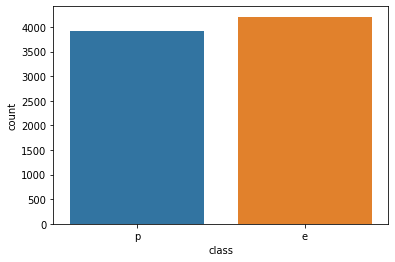

In [11]:
#check the count of each type of mushroom graphically
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="class",data=df_mushroom)
plt.show()

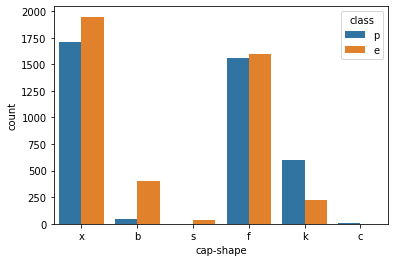

In [12]:
#check whether the count basis of cap shape
sns.countplot(x="cap-shape",hue="class",data=df_mushroom)
plt.show()


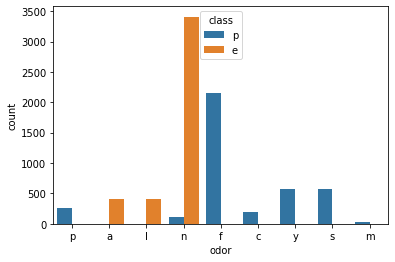

In [13]:
#count on the basis of "odor"
sns.countplot(x="odor",hue="class",data=df_mushroom)
plt.show()

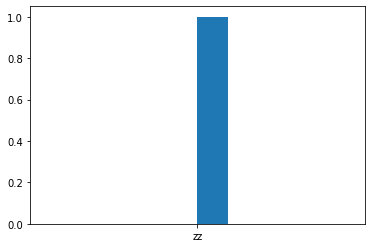

In [18]:
plt.hist(x="zz",bins=10,data=df_mushroom)
plt.show()

In [19]:
df_mushroom.skew()

Series([], dtype: float64)

In [21]:
#scaling data using standard 
df_x=df_mushroom.drop(columns=["class"])
y=df_mushroom[["class"]]
df_x=pd.get_dummies(df_x,drop_first=True)
df_x.shape

(8124, 95)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

C:\Users\605822\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\605822\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, ..., 0, 1, 0])

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=55)
principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data = principalComponents
# , columns = ['principal component 1', 'principal component 2'])
sum(pca.explained_variance_ratio_)
#We will use f1 score as the metrics as it is balanced dataset problem
#Maximum f1 score in between random states 42 to 100
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [27]:
#lets use logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
maxf1_score(lg_clf,principalComponents,y)

random state : 42  and f1 score:  0.9987212276214833
random state : 43  and f1 score:  0.9993610223642173
random state : 44  and f1 score:  0.9980806142034548
random state : 45  and f1 score:  1.0
random state : 46  and f1 score:  1.0
random state : 47  and f1 score:  1.0
random state : 48  and f1 score:  0.9993610223642173
random state : 49  and f1 score:  1.0
random state : 50  and f1 score:  0.9993610223642173
random state : 51  and f1 score:  1.0
random state : 52  and f1 score:  1.0
random state : 53  and f1 score:  1.0
random state : 54  and f1 score:  0.9987212276214833
random state : 55  and f1 score:  0.9993610223642173
random state : 56  and f1 score:  1.0
random state : 57  and f1 score:  0.9993610223642173
random state : 58  and f1 score:  1.0
random state : 59  and f1 score:  0.9993610223642173
random state : 60  and f1 score:  0.9993610223642173
random state : 61  and f1 score:  0.9993610223642173
random state : 62  and f1 score:  0.9993610223642173
random state : 63  and

In [28]:
#cross_val_score 
from sklearn.model_selection import cross_val_score
print("Mean f1 score for logistic classifier: ",cross_val_score(lg_clf,principalComponents,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for logistic classifier: ",cross_val_score(lg_clf,principalComponents,y,cv=5,scoring="f1").std())
print(cross_val_score(lg_clf,principalComponents,y,cv=5,scoring="f1"))

Mean f1 score for logistic classifier:  0.9267713206132407
standard deviation in f1 score for logistic classifier:  0.10482896445111968
[0.90668524 0.99936102 0.99808061 1.         0.72972973]


In [ ]:
#KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(principalComponents,y)
clf.best_params_
kc=KNeighborsClassifier(n_neighbors=2)
maxf1_score(kc,principalComponents,y)

In [ ]:
from sklearn.model_selection import cross_val_score
print("Mean f1 score for knn classifier: ",cross_val_score(kc,principalComponents,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for knn classifier: ",cross_val_score(kc,principalComponents,y,cv=5,scoring="f1").std())
print(cross_val_score(kc,principalComponents,y,cv=5,scoring="f1"))